# 종합실습 1
- 미세먼지로 인해 건강, 환경, 경제 등 영향을 주면서 다양한 문제를 일으키고 있다. 그래서 대기 중 오염물질과 기상정보를 활용하여  
  미세먼지 발생/증가에 영향을 미치는 인자를 도출하고, 그 영향도를 분석하고자 한다. 다양한 분석을 통해 미세먼지를 유발하는 영향인자를  
  선정하고, 선정된 영향인자를 활용하여 미세먼지 발생량을 예측하고, 대응방안을 수립하라.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc('axes', unicode_minus=False)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## 데이터 불러오기

In [15]:
df_raw = pd.read_csv('AIR_POLLUTION.csv', encoding = 'euc-kr')
df_raw['MeasDate'] = pd.to_datetime(df_raw['MeasDate']) 

In [16]:
df_raw.describe()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000000,365.000000,365.000000,311.000000,365.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,33.421918,0.023600,0.026814,0.517042,0.003033,13.863798,0.381639,2.225301,209.450820,60.295082,1005.848907,0.022951,5.064016
std,15.937983,0.011896,0.010271,0.152820,0.000632,9.830280,1.122127,0.723171,70.735018,14.534983,8.126823,0.222361,2.986119
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000,0.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.492500,0.000000,1.722500,160.250000,49.650000,999.400000,0.000000,2.510000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,14.000000,0.000000,2.095000,221.000000,61.050000,1006.450000,0.000000,5.310000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.070000,0.115000,2.620000,266.000000,69.950000,1011.575000,0.000000,7.570000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,11.800000,5.880000,351.000000,95.000000,1025.500000,3.200000,10.000000


In [17]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   366 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       366 non-null    float64       
 7   RAIN       366 non-null    float64       
 8   WIND       366 non-null    float64       
 9   WIND_DIR   366 non-null    int64         
 10  HUMIDITY   366 non-null    float64       
 11  ATM_PRESS  366 non-null    float64       
 12  SNOW       366 non-null    float64       
 13  CLOUD      366 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 40.2 KB


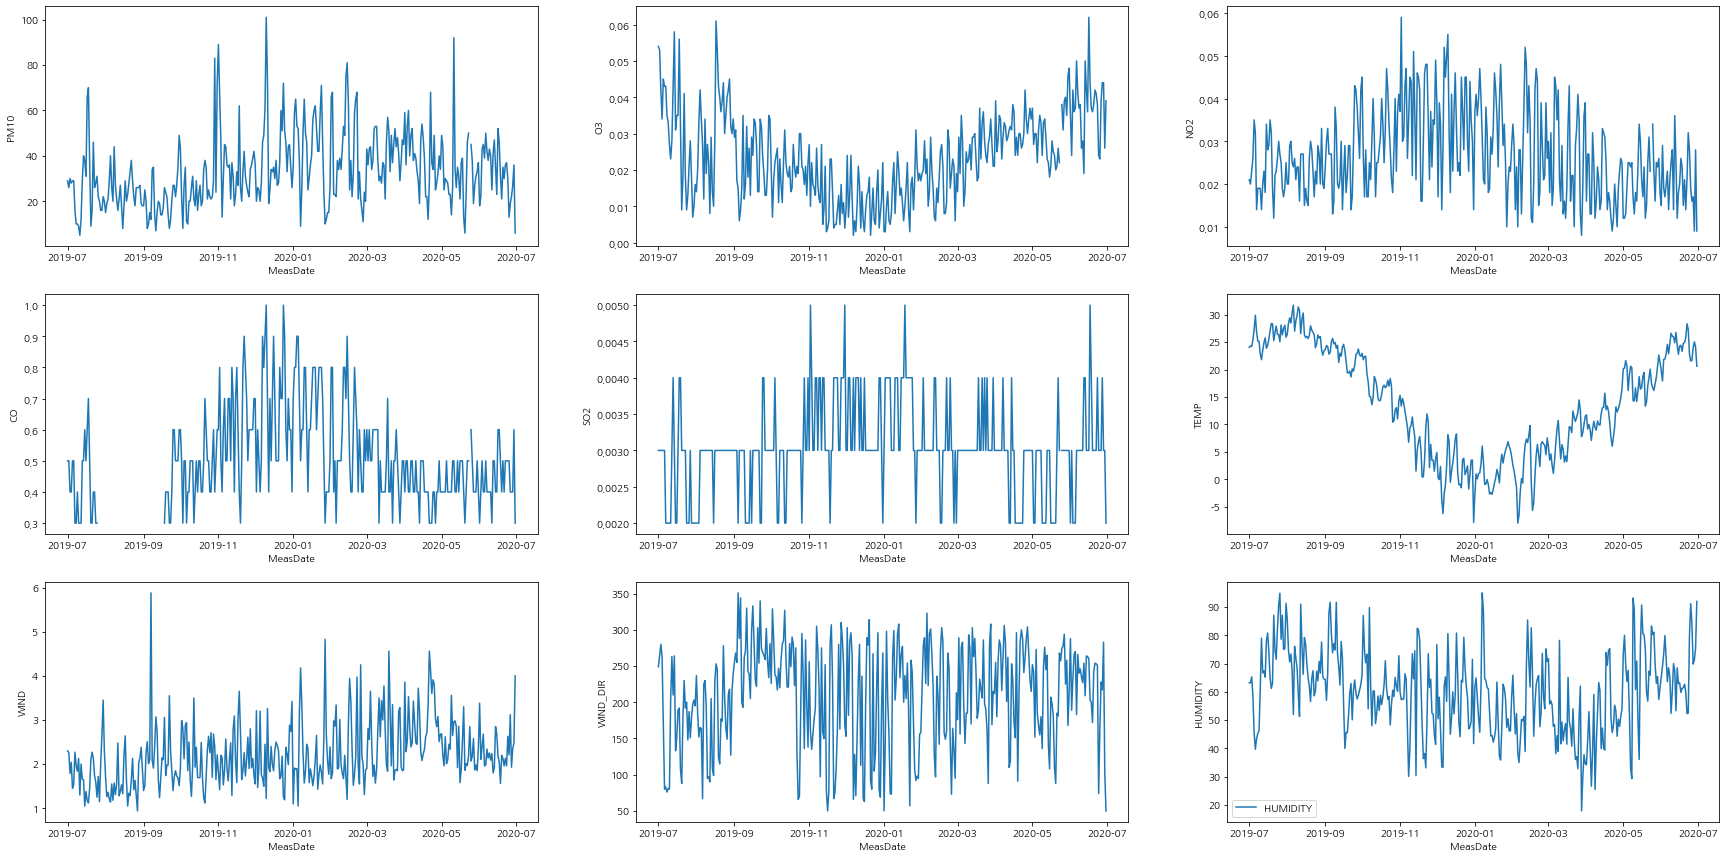

In [18]:
# 일자별 데이터 분포
fig = plt.figure(figsize=(30,15))

# 일자별 PM10 분포
plt.subplot(331)
plt.plot(df_raw["MeasDate"], df_raw["PM10"], label = "PM10")
plt.ylabel("PM10"); plt.xlabel("MeasDate")

# 일자별 O3 분포
plt.subplot(332)
plt.plot(df_raw["MeasDate"], df_raw["O3"], label = "O3")
plt.ylabel("O3"); plt.xlabel("MeasDate")

# 일자별 NO2 분포
plt.subplot(333)
plt.plot(df_raw["MeasDate"], df_raw["NO2"], label = "NO2")
plt.ylabel("NO2"); plt.xlabel("MeasDate")

# 일자별 CO 분포
plt.subplot(334)
plt.plot(df_raw["MeasDate"], df_raw["CO"], label = "CO")
plt.ylabel("CO"); plt.xlabel("MeasDate")

# 일자별 SO2 분포
plt.subplot(335)
plt.plot(df_raw["MeasDate"], df_raw["SO2"], label = "SO2")
plt.ylabel("SO2"); plt.xlabel("MeasDate")

# 일자별 TEMP 분포
plt.subplot(336)
plt.plot(df_raw["MeasDate"], df_raw["TEMP"], label = "TEMP")
plt.ylabel("TEMP"); plt.xlabel("MeasDate")

# 일자별 WIND 분포
plt.subplot(337)
plt.plot(df_raw["MeasDate"], df_raw["WIND"], label = "WIND")
plt.ylabel("WIND"); plt.xlabel("MeasDate")

# 일자별 WIND_DIR 분포
plt.subplot(338)
plt.plot(df_raw["MeasDate"], df_raw["WIND_DIR"], label = "WIND_DIR")
plt.ylabel("WIND_DIR"); plt.xlabel("MeasDate")

# 일자별 HUMIDITY 분포
plt.subplot(339)
plt.plot(df_raw["MeasDate"], df_raw["HUMIDITY"], label = "HUMIDITY")
plt.ylabel("HUMIDITY"); plt.xlabel("MeasDate")

plt.legend(loc = "best")
plt.show()

## 결측치 확인 및 제거

- PM10 -> 목표변수이므로 분할,
- O3 -> (20.05.24)결측치 1개
- NO2 -> (20.05.24)결측치 1개
- CO -> 결측치 55개
- SO2 -> (20.05.24)결측치 1개
- TEMP
- RAIN
- WIND
- WIND_DIR
- HUMIDITY
- ATM_PRESS
- SNOW
- CLOUD
  
  
- 2020.05.25 일자의 O3, NO2, CO, SO2 데이터가 일괄적으로 존재하지 않기에, 해당 일자의 데이터 삭제
- CO는 평균값으로 대체

In [19]:
df_raw.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

In [20]:
df_raw.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92


In [21]:
df_raw.dropna(subset=['PM10'], inplace = True)
df_raw['CO'].fillna(df_raw['CO'].mean(), inplace = True)

In [22]:
# x, y 데이터 분리
df_raw_x = df_raw.drop("PM10", axis = 1)
df_raw_y = df_raw["PM10"]

In [23]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_raw, # 데이터
                                     test_size = 0.3, # test 데이터의 비율
                                     random_state = 1234)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (255, 14)
test data size : (110, 14)


## 이상치 확인

<AxesSubplot:>

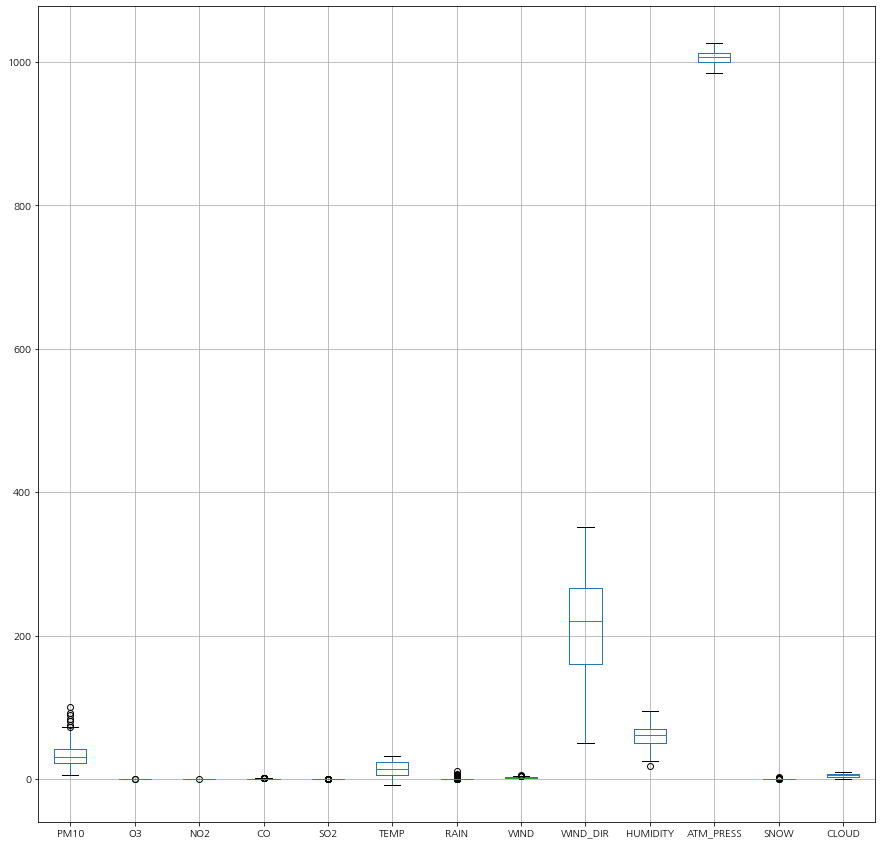

In [24]:
df_raw.boxplot(figsize=(15,15))

### 이상치 확인 결과
- 다양한 변수들에서 이상치로 보이는 요소들이 확인은 되었으나, 이상치라고 판단하기에는 정보가 부족하여 대체하지 않고 넘어가도록 한다.

In [25]:
# RAIN 쪼개기
newRain = list()

for data in df_raw["RAIN"]:
    if data == 0:
        newRain.append("X")
    else:
        newRain.append("O")

df_raw["NEWRAIN"] = newRain
df_raw

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,NEWRAIN
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70,X
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83,X
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29,X
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54,X
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73,O
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21,X
363,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63,X
364,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58,O


In [26]:
# SNOW 쪼개기
newSnow = list()

for data in df_raw["SNOW"]:
    if data == 0:
        newSnow.append("X")
    else:
        newSnow.append("O")

df_raw["NEWSNOW"] = newSnow
df_raw

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,NEWRAIN,NEWSNOW
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70,X,X
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83,X,X
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29,X,X
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54,X,X
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73,O,X
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21,X,X
363,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63,X,X
364,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58,O,X


array([<AxesSubplot:title={'center':'O'}>,
       <AxesSubplot:title={'center':'X'}>], dtype=object)

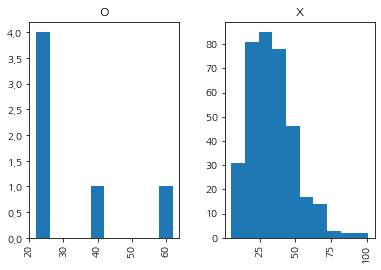

In [43]:
df_raw.hist(column = "PM10", by = "NEWSNOW")

(array([12., 42., 60., 54., 36., 25., 10., 10.,  1.,  2.]),
 array([ 6. , 14.3, 22.6, 30.9, 39.2, 47.5, 55.8, 64.1, 72.4, 80.7, 89. ]),
 <BarContainer object of 10 artists>)

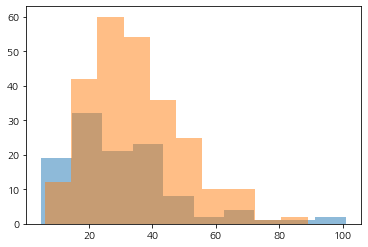

In [38]:
plt.hist(df_raw[df_raw["NEWRAIN"]=="O"]["PM10"], label="비안옴", alpha=0.5)
plt.hist(df_raw[df_raw["NEWRAIN"]=="X"]["PM10"], label="비옴", alpha=0.5)

<AxesSubplot:xlabel='MeasDate', ylabel='PM10'>

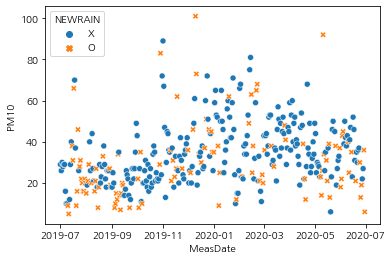

In [39]:
sns.scatterplot(x='MeasDate', y='PM10', hue='NEWRAIN',style='NEWRAIN', data=df_raw)

<AxesSubplot:xlabel='MeasDate', ylabel='PM10'>

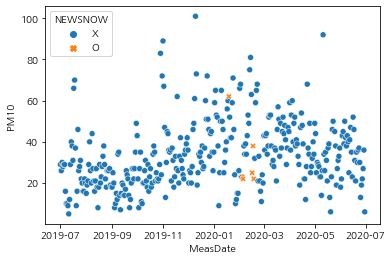

In [42]:
sns.scatterplot(x='MeasDate', y='PM10', hue='NEWSNOW',style='NEWSNOW', data=df_raw)

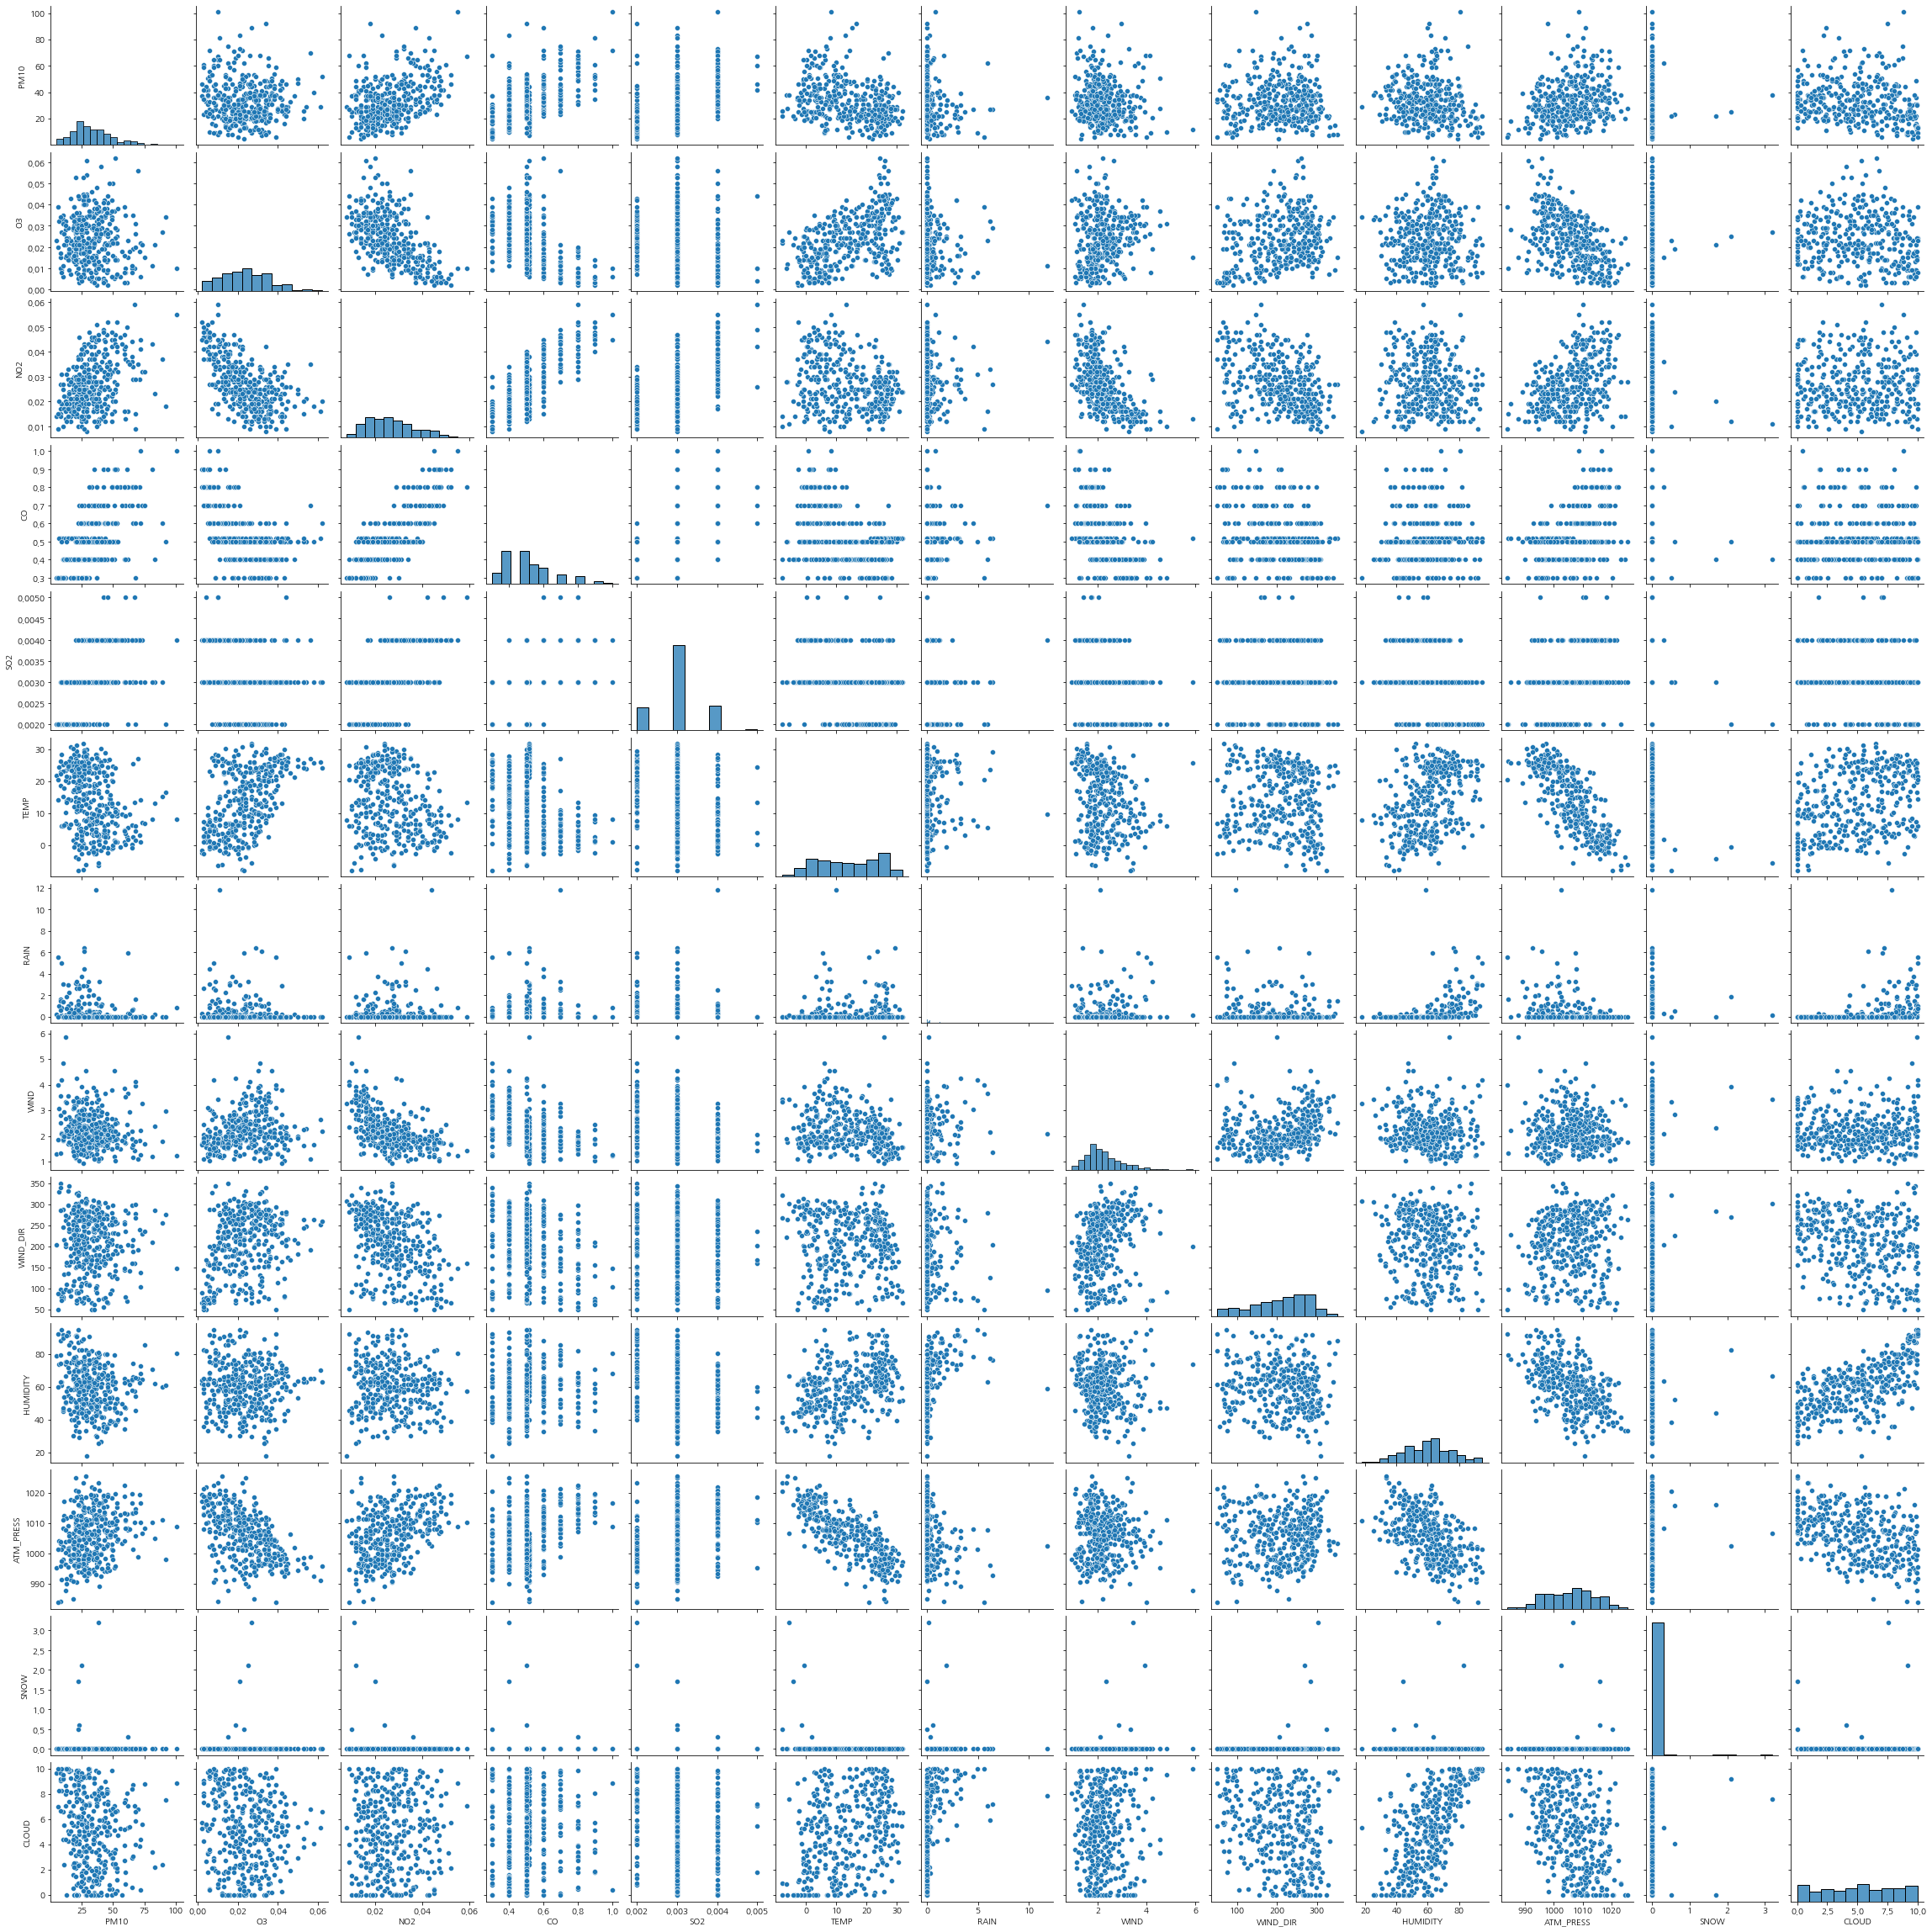

In [41]:
sns.pairplot(df_raw)

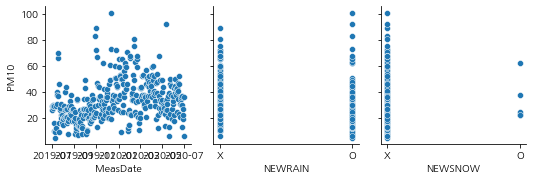

In [40]:
sns.pairplot(df_raw, y_vars=["PM10"], x_vars=['MeasDate', 'NEWRAIN', 'NEWSNOW'])

## 가설 검정

### 가설설정
- 1. 서풍이 불면 미세먼지 발생량은 증가할 것이다.
- 2. 기온이 높을수록 미세먼지 발생량은 증가할 것이다.
- 3. 습도가 높을수록 미세먼지 발생량은 감소할 것이다.

#### 가설과 부합하지 않은 변수 삭제
- RAIN, SNOW, ATM_PRESS, CLOUD은 가설과 상관없다고 판단하여 삭제

In [71]:
df_raw.drop(["RAIN", "SNOW", "CLOUD", 'ATM_PRESS', 'WIND', 'O3', 'NO2', 'CO', 'SO2'], axis=1, inplace=True)

#### 가설에 따른 파생변수 설정
- 1. WIND_DIR을 4개의 방위로 나뉘어 1(서), 2(북), 3(동), 4(남)으로 분리하여 새로운 변수를 생성한다.
- 2. TEMP의 평균을 기준으로 높은 데이터를 1으로, 낮은 데이터를 0으로 분리하여 새로운 변수를 생성한다.
- 3. HUMIDITY의 평균을 기준으로 높은 데이터를 0으로, 낮은 데이터를 1로 분리하여 새로운 변수를 생성한다.

In [72]:
# 1. WIND_DIR을 4개의 방위로 나뉘어 1(서), 2(북), 3(동), 4(남)으로 분리하여 새로운 변수를 생성한다.
newWind = list()

for data in df_raw["WIND_DIR"]:
    if 225 <= data < 315:
        newWind.append("W")
    elif 0 <= data < 45 or 315 <= data <= 360:
        newWind.append("N")
    elif 45 <= data < 135:
        newWind.append("E")
    else:
        newWind.append("S")

df_raw["NEWWIND"] = newWind
df_raw

,MeasDate,PM10,TEMP,WIND_DIR,HUMIDITY,NEWWIND
0,2019-07-01,29.0,24.03,249,63.2,W
1,2019-07-02,26.0,24.29,265,63.2,W
2,2019-07-03,30.0,24.18,280,65.3,W
3,2019-07-04,28.0,25.35,263,58.6,W
4,2019-07-05,29.0,27.30,175,45.5,S
...,...,...,...,...,...,...
361,2020-06-26,19.0,21.66,228,84.0,W
362,2020-06-27,22.0,23.94,217,69.8,S
363,2020-06-28,27.0,25.03,283,71.3,W
364,2020-06-29,36.0,24.06,103,75.5,E


In [73]:
# 2. TEMP의 평균을 기준으로 높은 데이터를 HIGH로, 낮은 데이터를 LOW로 분리하여 새로운 변수를 생성한다.
newTemp = list()

for data in df_raw["TEMP"]:
    if data >= df_raw['TEMP'].mean():
        newTemp.append("HIGH")
    else:
        newTemp.append("LOW")

df_raw["NEWTEMP"] = newTemp
df_raw

,MeasDate,PM10,TEMP,WIND_DIR,HUMIDITY,NEWWIND,NEWTEMP
0,2019-07-01,29.0,24.03,249,63.2,W,HIGH
1,2019-07-02,26.0,24.29,265,63.2,W,HIGH
2,2019-07-03,30.0,24.18,280,65.3,W,HIGH
3,2019-07-04,28.0,25.35,263,58.6,W,HIGH
4,2019-07-05,29.0,27.30,175,45.5,S,HIGH
...,...,...,...,...,...,...,...
361,2020-06-26,19.0,21.66,228,84.0,W,HIGH
362,2020-06-27,22.0,23.94,217,69.8,S,HIGH
363,2020-06-28,27.0,25.03,283,71.3,W,HIGH
364,2020-06-29,36.0,24.06,103,75.5,E,HIGH


In [74]:
# 3. HUMIDITY의 평균을 기준으로 높은 데이터를 HIGH로, 낮은 데이터를 LOW로 분리하여 새로운 변수를 생성한다.
newHumi = list()

for data in df_raw["HUMIDITY"]:
    if data >= df_raw['HUMIDITY'].mean():
        newHumi.append("HIGH")
    else:
        newHumi.append("LOW")

df_raw["NEWHUMI"] = newHumi
df_raw

,MeasDate,PM10,TEMP,WIND_DIR,HUMIDITY,NEWWIND,NEWTEMP,NEWHUMI
0,2019-07-01,29.0,24.03,249,63.2,W,HIGH,HIGH
1,2019-07-02,26.0,24.29,265,63.2,W,HIGH,HIGH
2,2019-07-03,30.0,24.18,280,65.3,W,HIGH,HIGH
3,2019-07-04,28.0,25.35,263,58.6,W,HIGH,LOW
4,2019-07-05,29.0,27.30,175,45.5,S,HIGH,LOW
...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,21.66,228,84.0,W,HIGH,HIGH
362,2020-06-27,22.0,23.94,217,69.8,S,HIGH,HIGH
363,2020-06-28,27.0,25.03,283,71.3,W,HIGH,HIGH
364,2020-06-29,36.0,24.06,103,75.5,E,HIGH,HIGH


#### 파생변수 생성에 사용된 변수 삭제

In [89]:
#df_raw.drop(["TEMP", "WIND_DIR", "HUMIDITY"], axis=1, inplace=True)
df_raw

,MeasDate,PM10,TEMP,WIND_DIR,HUMIDITY,NEWWIND,NEWTEMP,NEWHUMI
0,2019-07-01,29.0,24.03,249,63.2,W,HIGH,HIGH
1,2019-07-02,26.0,24.29,265,63.2,W,HIGH,HIGH
2,2019-07-03,30.0,24.18,280,65.3,W,HIGH,HIGH
3,2019-07-04,28.0,25.35,263,58.6,W,HIGH,LOW
4,2019-07-05,29.0,27.30,175,45.5,S,HIGH,LOW
...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,21.66,228,84.0,W,HIGH,HIGH
362,2020-06-27,22.0,23.94,217,69.8,S,HIGH,HIGH
363,2020-06-28,27.0,25.03,283,71.3,W,HIGH,HIGH
364,2020-06-29,36.0,24.06,103,75.5,E,HIGH,HIGH


### 1번 가설 검정
    1. 귀무가설 : 바람의 방향은 미세먼지 발생량에 영향을 줄 것이다.
    2. 대립가설 : 바람의 방향은 미세먼지 발생량에 영향을 주지 않을 것이다.
    3. 유의수준 : 0.05
    4. 상관분석 수행
    5. 분석 결과 해석

### 2번 가설 검정
    1. 귀무가설 : 기온이 높을수록 미세먼지 발생량은 증가할 것이다.
    2. 대립가설 : 기온이 높을수록 미세먼지 발생량은 감소할 것이다.
    3. 유의수준 : 0.05
    4. 상관분석 수행
    5. 분석 결과 해석

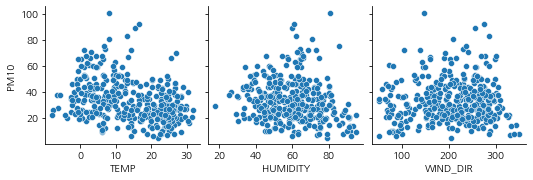

In [92]:
sns.pairplot(df_raw, y_vars="PM10", x_vars=["TEMP", "HUMIDITY", "WIND_DIR"])

### 3번 가설 검정
    1. 귀무가설 : 습도가 높을수록 미세먼지 발생량은 감소할 것이다.
    2. 대립가설 : 습도가 높을수록 미세먼지 발생량은 증가할 것이다.
    3. 유의수준 : 0.05
    4. 상관분석 수행
    5. 분석 결과 해석

## 탐색적 방법(그래프 분석)

<AxesSubplot:>

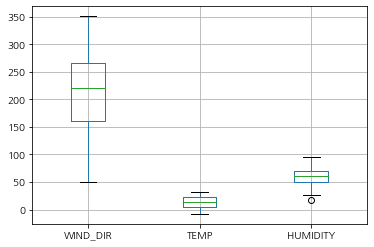

In [91]:
df_raw.boxplot(["WIND_DIR", "TEMP", "HUMIDITY"])

### NEWWIND 변수에 대한 그래프 분석

<AxesSubplot:ylabel='None'>

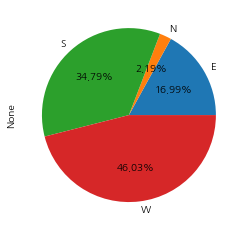

In [77]:
df_count = df_raw.groupby(["NEWWIND"]).size()
df_count.plot.pie(y="PM10", autopct = "%.2f%%")

### NEWTEMP 변수에 대한 그래프 분석

<AxesSubplot:ylabel='None'>

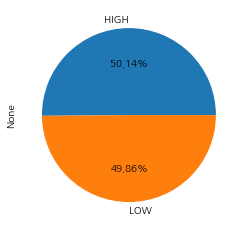

In [78]:
df_count = df_raw.groupby(["NEWTEMP"]).size()
df_count.plot.pie(y="PM10", autopct = "%.2f%%")

### NEWHUMI 변수에 대한 그래프 분석

<AxesSubplot:ylabel='None'>

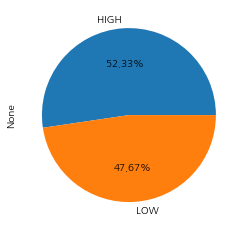

In [79]:
df_count = df_raw.groupby(["NEWHUMI"]).size()
df_count.plot.pie(y="PM10", autopct = "%.2f%%")

### 그래프 분석 결과
- 1. 변수 "NEWWIND"에 대하여

- 2. 변수 "NEWTEMP"에 대하여

- 3. 변수 "NEWHUMI"에 대하여

In [81]:
df_x_dummy = pd.get_dummies(df_raw)

df_raw

,MeasDate,PM10,TEMP,WIND_DIR,HUMIDITY,NEWWIND,NEWTEMP,NEWHUMI
0,2019-07-01,29.0,24.03,249,63.2,W,HIGH,HIGH
1,2019-07-02,26.0,24.29,265,63.2,W,HIGH,HIGH
2,2019-07-03,30.0,24.18,280,65.3,W,HIGH,HIGH
3,2019-07-04,28.0,25.35,263,58.6,W,HIGH,LOW
4,2019-07-05,29.0,27.30,175,45.5,S,HIGH,LOW
...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,21.66,228,84.0,W,HIGH,HIGH
362,2020-06-27,22.0,23.94,217,69.8,S,HIGH,HIGH
363,2020-06-28,27.0,25.03,283,71.3,W,HIGH,HIGH
364,2020-06-29,36.0,24.06,103,75.5,E,HIGH,HIGH


## 모델 학습

### Linear Regression

### Decision Tree

### Random Forest

### Gradient Boosting

## 최종 모델 도출

## 결과 도출